In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import skimage as sk

In [50]:
def plotCheckerboard(image1, image2, pattern=[4, 4]):
    imagesCheckerboard = sitk.CheckerBoard(image1, image2, pattern)
    plt.imshow(sitk.GetArrayViewFromImage(imagesCheckerboard), cmap="gray")
    plt.axis("off")
    plt.margins(0, 0)
    plt.show()

def plotImages(*args, nrows, ncols):
    figImages, axImages = plt.subplots(nrows, ncols)
    titles = ["pevný obraz", "pohyblivý obraz", "inicializační transformace", "finální transformace"]
    for ax, arg, title in zip(axImages.reshape(-1), args, titles):
        ax.imshow(sitk.GetArrayViewFromImage(arg), cmap="gray")
        ax.set_title(title)
        ax.set_axis_off()
    figImages.tight_layout()
    plt.show()

def plotAlphaBlend(image1: sitk.Image, image2, alpha=0.5):
    img1 = sitk.Cast(image1, sitk.sitkFloat32)
    img2 = sitk.Cast(image2, sitk.sitkFloat32)
    imageOutput = (alpha * img1) + (1 - alpha) * img2

    plt.imshow(sitk.GetArrayViewFromImage(imageOutput), cmap="gray")
    plt.show()


In [3]:
patientNumber = "09"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")
imagesFile = np.load(os.path.join(regDir, f"pacient{patientNumber}Images{view.upper()}.npz"))
pointsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}PointsInfo{view.upper()}.npz"))


In [4]:
images = {key: imagesFile[key] for key in imagesFile.files}
pointsInfo = {key: pointsInfoFile[key] for key in pointsInfoFile.files} 

In [5]:
movingImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingInitialImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingInitialImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingFinalImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingFinalImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
fixedImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["fixedImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)

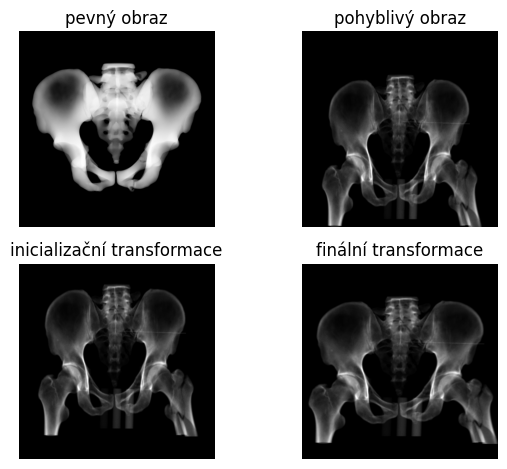

In [6]:
plotImages(fixedImageRescaled, movingImageRescaled, 
           movingInitialImageRescaled, movingFinalImageRescaled, 
           nrows=2, ncols=2)

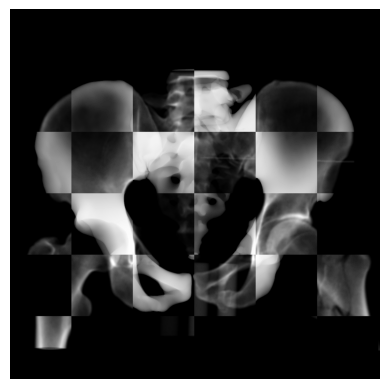

In [7]:
plotCheckerboard(fixedImageRescaled, movingFinalImageRescaled, pattern=[6, 6])

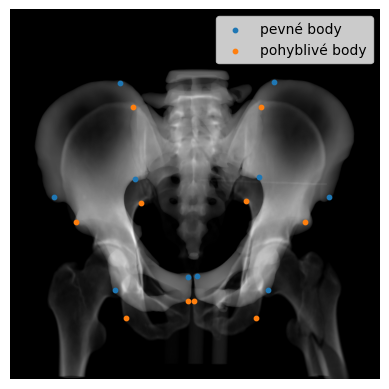

In [8]:
plt.imshow(sitk.GetArrayViewFromImage(fixedImageRescaled), cmap="gray")
plt.imshow(sitk.GetArrayViewFromImage(movingImageRescaled), cmap="gray", alpha=0.5)
plt.scatter(list(pointsInfo["fixedPoints"].T)[0], list(pointsInfo["fixedPoints"].T)[1], 
            c="#1f77b4", s=10, label="pevné body")
plt.scatter(list(pointsInfo["movingPoints"].T)[0], list(pointsInfo["movingPoints"].T)[1], 
            c="#ff7f0e", s=10, label="pohyblivé body")
plt.axis("off")
plt.legend()
plt.show()

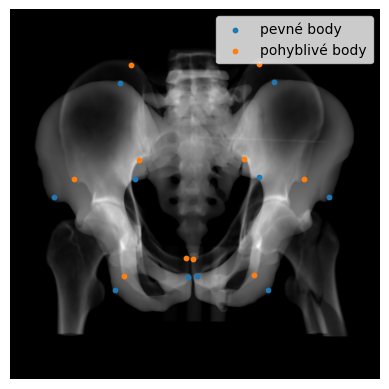

In [12]:
plt.imshow(sitk.GetArrayViewFromImage(fixedImageRescaled), cmap="gray")
plt.imshow(sitk.GetArrayViewFromImage(movingInitialImageRescaled), cmap="gray", alpha=0.5)
plt.scatter(list(pointsInfo["fixedPoints"].T)[0], list(pointsInfo["fixedPoints"].T)[1], 
            c="#1f77b4", s=10, label="pevné body")
plt.scatter(list(pointsInfo["movingInitialPoints"].T)[0], list(pointsInfo["movingInitialPoints"].T)[1], 
            c="#ff7f0e", s=10, label="pohyblivé body")
plt.axis("off")
plt.legend()
plt.show()

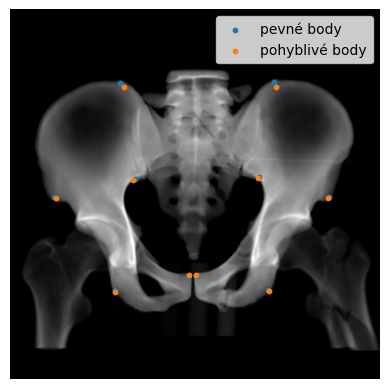

In [13]:
plt.imshow(sitk.GetArrayViewFromImage(fixedImageRescaled), cmap="gray")
plt.imshow(sitk.GetArrayViewFromImage(movingFinalImageRescaled), cmap="gray", alpha=0.5)
plt.scatter(list(pointsInfo["fixedPoints"].T)[0], list(pointsInfo["fixedPoints"].T)[1], 
            c="#1f77b4", s=10, label="pevné body")
plt.scatter(list(pointsInfo["movingFinalPoints"].T)[0], list(pointsInfo["movingFinalPoints"].T)[1], 
            c="#ff7f0e", s=10, label="pohyblivé body")
plt.axis("off")
plt.legend()
plt.show()

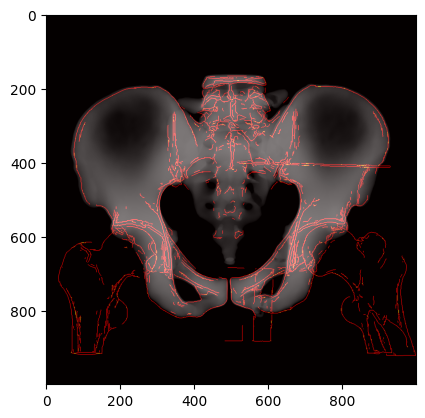

In [36]:
movingFinalEdges = sitk.CannyEdgeDetection(sitk.GetImageFromArray(images["movingFinalImage"]), 
                                           lowerThreshold=500.0, upperThreshold=600.0)

plt.imshow(sitk.GetArrayViewFromImage(fixedImageRescaled), cmap="gray")
plt.imshow(sitk.GetArrayViewFromImage(movingFinalEdges), cmap="hot", alpha=0.5)
plt.show()

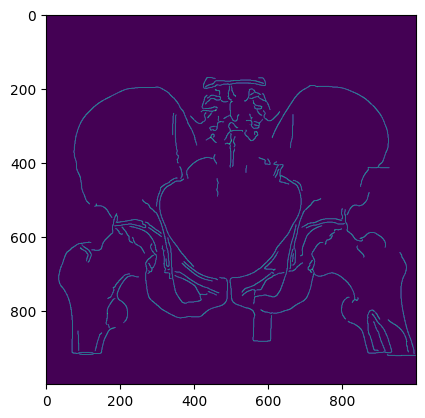

In [46]:
movingFinalEdgesSk = sk.feature.canny((sitk.GetArrayViewFromImage(movingFinalImageRescaled)), 2)
plt.imshow(movingFinalEdgesSk)

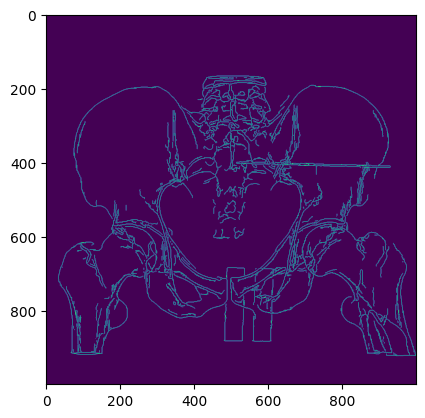

In [30]:
binaryContours = sitk.BinaryContour(sitk.Cast(movingFinalEdges, sitk.sitkUInt8), fullyConnected=False)
plt.imshow(sitk.GetArrayViewFromImage(binaryContours))

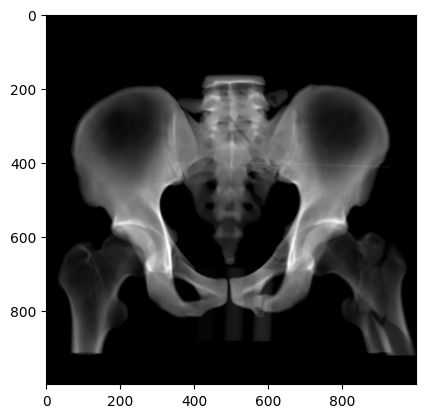

In [55]:
plotAlphaBlend(movingFinalImageRescaled, fixedImageRescaled, alpha=0.6)